https://docs.google.com/document/d/1eDTPTPkedpLvYNiBokzMkPj9J26v93s-V996gd94Vmo/edit

1) Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs.

url_user_data = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/user_data.csv.zip?raw=true"

url_logs = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/logs.csv.zip?raw=true"


Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix

Сколько уникальных значений принимает переменная platform?


In [ ]:
import pandas as pd
url_user_data = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/user_data.csv.zip?raw=true"
df = pd.read_csv(url_user_data, compression="zip")
df.head()
url_logs = "https://github.com/dm-fedorov/pandas_basic/blob/master/data/logs.csv.zip?raw=true"
df_two = pd.read_csv(url_logs, compression="zip")
df.sample(2)

,client,premium,age
2740,49536,False,26
1511,82934,True,67


In [ ]:
df_two.sample(2)

,client,success,platform,time
2563,91799,True,phone,1585451550
524,35433,False,phone,1585475108


In [ ]:
df.shape

(2954, 3)

In [ ]:
df_two.shape

(4500, 4)

In [ ]:
df.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [ ]:
df_two.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [ ]:
df.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [ ]:
df_two.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [ ]:
df.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [ ]:
df_two.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [ ]:
df_two.platform.nunique() # количество уникальных значений в 'platform'

3

2) Какой клиент совершил больше всего успешных операций? (success == True)

Если пользователей несколько, то укажите их через запятую в порядке возрастания.


In [ ]:
df_two_true = df_two[df_two.success == True].groupby('client').agg({'success':'count'}).sort_values('success')
list(df_two_true[df_two_true.success == df_two_true.success.max()].sort_index().index)

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [ ]:
i = df_two.query('success == True') \
             .groupby('client',as_index=False)\
             .agg({'platform':'count'})\
             .rename(columns = {'platform':'success'}) \
             .sort_values('success',ascending=False) # query - использовать чаще
max_i = i.success.max()
ii = i.query('success == @max_i').sort_values('client').client.tolist() # .tolist() - новенькое
print(*ii, sep = ',') # (*ii, sep = ',') - новенькое

12179,28719,36165,52870,61468,61473,78349,82563,92584


3) С какой платформы осуществляется наибольшее количество успешных операций?

In [ ]:
df_two[df_two.success == True].groupby('platform').agg({'success':'count'}).sort_values('success',ascending=False).index[0]
# использовать idxmax() чаще!

'phone'

In [ ]:
df_two.sample(3)

,client,success,platform,time
1438,73445,True,computer,1585471245
1713,10226,False,computer,1585458888
3995,71269,True,computer,1585457264


4) Какую платформу предпочитают премиумные клиенты?

In [ ]:
df_Ripley = pd.merge(df,df_two,how='outer',on='client')
#df_Ripley.isna().sum()
df_Ripley[df_Ripley.premium	== True].platform.value_counts().index[0]

'phone'

5) Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([[ 35.,  53.,  32.,  48.,  38.,  32.,  45.,  41.,  39.,  43.],
        [232., 281., 247., 272., 273., 290., 238., 237., 228., 250.]]),
 array([20. , 24.9, 29.8, 34.7, 39.6, 44.5, 49.4, 54.3, 59.2, 64.1, 69. ]),
 <a list of 2 Lists of Patches objects>)

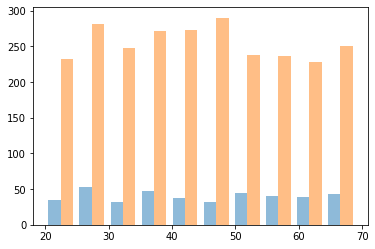

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gellary!!!!!!!
x = df[df.premium	== True]['age']
y = df[df.premium	== False]['age']
plt.hist([x,y], alpha=0.5)


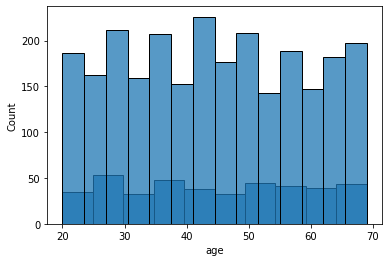

In [ ]:
import seaborn as sns # seaborn gellary!!!!!!!
x = df[df.premium	== True]['age']
y = df[df.premium	== False]['age']
sns.histplot(x)
sns.histplot(y)

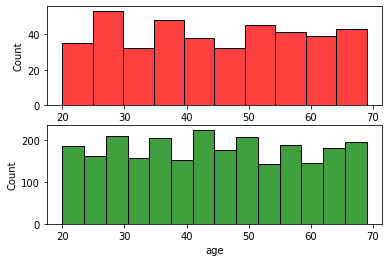

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2,ncols=1) # размножение графиков
sns.histplot(x, ax=ax[0],color = 'red')
sns.histplot(y, ax=ax[1],color = 'green')

6) Постройте график распределения числа успешных операций для клиентов

In [ ]:
df_two.head(3)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894


In [ ]:
client_success = df_two.groupby(['client']).agg({'success':'count'}).head(4)

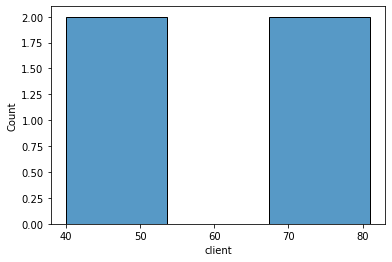

In [ ]:
sns.histplot(data = client_success, x = 'client') # не выходит!!!!!!!

7) Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.barplot
(x – возраст, y – число успешных операций).


Клиенты какого возраста совершили наибольшее количество успешных действий?


In [ ]:
df_two.

In [ ]:
df.head(3)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64


In [ ]:
df_two.head(3)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894


In [ ]:
df_Ripley = pd.merge(df,df_two,how='outer',on='client')
df_Ripley.sample(3)

,client,premium,age,success,platform,time
3234,50093,False,50.0,False,phone,1585438316
1066,2819,False,37.0,True,computer,1585450135
4094,2620,NaN,NaN,True,phone,1585448558


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


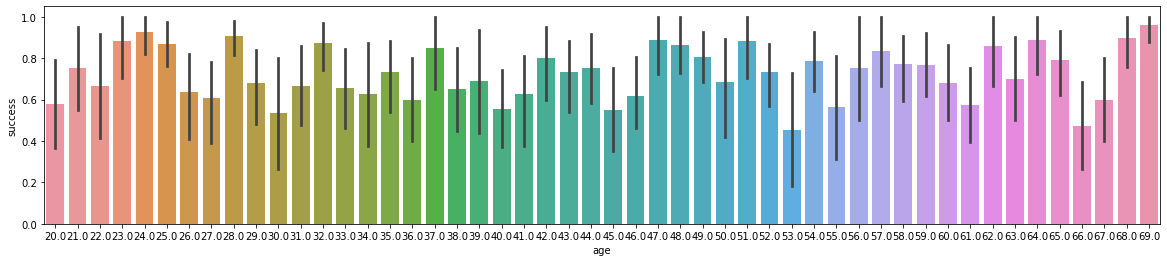

In [ ]:
import matplotlib.gridspec as gridspec

x = df_Ripley[df_Ripley.platform == 'computer']['age']
y = df_Ripley[df_Ripley.platform == 'computer']['success']
plt.figure(figsize=(20,4)) # изменение масштаба графика!!!!!!!!!!!!!!!!!!!!!!!!
sns.barplot(x, y)
plt.show()